<h1> Projeto de Segmentação de Clientes - Departamento de Marketing </h1>

# 1.0 Configurações

## 1.1 Bibliotecas

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans

import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')

## 1.2 Funções Auxiliares

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

def numero_cluster(data_scaled):
    wcss = []
    range_values = range(1,20)
    for i in range_values:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
        
    plt.plot(wcss, 'bx-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.grid(True);

## 1.3 Dicionário de Dados

- `CUSTID` : Identificador do cliente.
- `BALANCE`: Saldo para fazer compras.
- `BALANCE_FREQUENCY`: Frequência que o saldo é atualizado (1 = frequente, 0 = não frequente).
- `PURCHASES`: Quantidade de compras realizadas.
- `ONEOFFPURCHASES`: Quantidade de compras feitas "de uma vez só" (sem parcelar).
- `INSTALLMENTS_PURCHASES`: Quantidade de compras parceladas.
- `CASH_ADVANCE`: Dinheiro adiantado.
- `PURCHASES_FREQUENCY`: Frequência das compras (entre 1 e 0).
- `ONEOFF_PURCHASES_FREQUENCY`: Frequência de compras à vista (entre 1 e 0).
- `PURCHASES_INSTALLMENTS_FREQUENCY`: Frequência de compras parceladas (entre 1 e 0).
- `CASH_ADVANCE_FREQUENCY`: Frequência de saques de dinheiro adiantado.
- `CASH_ADVANVE_TRX`: Número de transações feitas como "Cash in Advance".
- `PURCHASES_TRX`: Número de compras.
- `CREDIT_LIMIT`: Limite do cartão de crédito.
- `PAYMENTS`: Valor pago.
- `MINIMUM_PAYMENTS`: Valor mínimo pago.
- `PRC_FULL_PAYMENT`: Percentual de pagamentos da fatura completa.
- `TENURE`: Posse do titular do cartão.

## 1.4 Carregando Dados

In [3]:
df = pd.read_csv('/home/nickolas/Área de Trabalho/DS/projetos/pa001/dados/bank.csv')

# 2.0 Descrição dos Dados

## 2.1 Dimensão dos Dados

In [4]:
print('Observações:\n')
print(f'Quantidade de Clientes: {df.shape[0]}')
print(f'Quantidade de Características: {df.shape[1]}')

Observações:

Quantidade de Clientes: 8950
Quantidade de Características: 18


## 2.2 Características dos Dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Observações:**

- Existem dados faltantes nas variáveis `CREDIT_LIMIT` e `MINIMUM_PAYMENTS`.
- Os tipos de dados estão de acordo não sendo necessário fazer alguma mudança.
- Memória Usada: 1.2 MB

## 2.3 Identificação de Dados Faltantes

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
print(f'Verificação de Dados Duplicados:', df.duplicated().sum())

Verificação de Dados Duplicados: 0


## 2.4 Tratando Dados Faltantes

- Tratando variável `MINIMUM_PAYMENTS` com a média.
- Tratando variável `CREDIT_LIMIT` com a média.

In [8]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace(np.nan, df['MINIMUM_PAYMENTS'].mean())

df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].replace(np.nan, df['CREDIT_LIMIT'].mean())

## 2.5 Estatística Descritiva

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


**Algumas Observações:**

- O saldo para fazer compras em média é 1564.47 dólares
- Em média a atualização de saldo dos clientes é de 88%.
- Em média, os clientes gastam 1003.20 dólares com compras.
- Em média, os clientes gastam 592.44 dólares com compras a vista.
- Em média, os clientes gastam 411.07 dólares com compras parceladas.
- Em média, 36.44% dos clientes preferem fazer compras parceladas com frequência do que compras a vista (20.25%).
- Em média, 13.51% dos clientes sacam dinheiro do crédito com frequência.
- Em média, o limite do cartão dos clientes é de 4494.45 dólares.
- Em média, 15.37% dos clientes pagam a fatura completa.
- Em média, os clientes estão há 12 anos ativos no banco.

# 3.0 Análise Exploratória de Dados

## 3.1 Análise Univariada

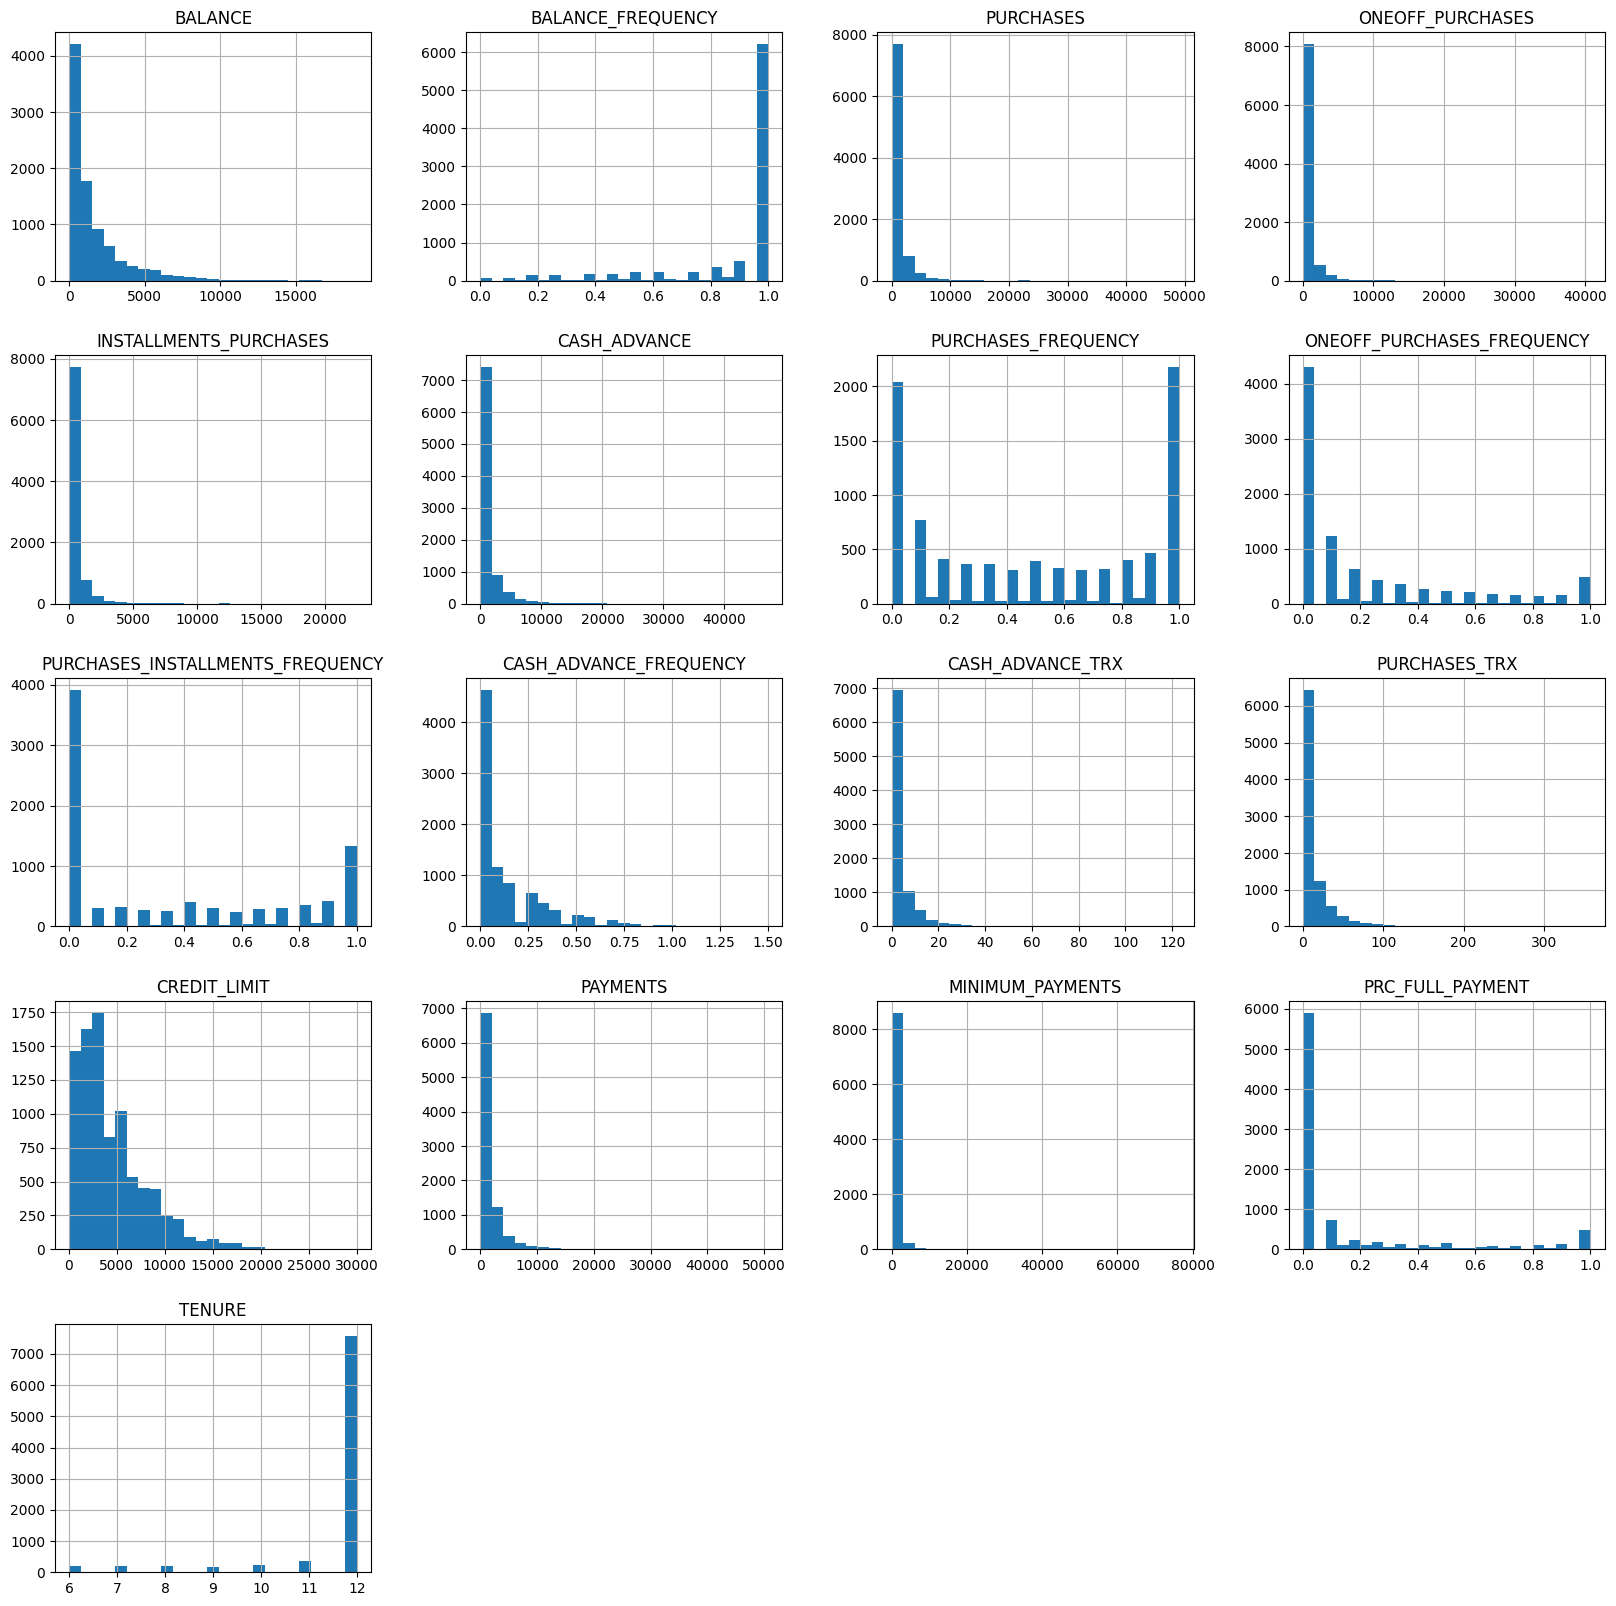

In [10]:
# Definindo o tamanho das figuras
fig = plt.figure(figsize = (20,20))

#sets axes
ax = fig.gca()

# Plotando histogramas
df.hist(ax = ax, bins=25);

**Observações:**

- Mais de 4000 clientes tem saldo baixo para fazer compras.
- Cerca de 6000 clientes mantém sua o saldo atualizado.
- 2778 compras de até 100 dólares foram realizadas.
- 4553 compras à vista de até 50 dólares foram realizadas.
- 3994 compras parceladas de até 25 dólares foram realizadas.
- 2043 clientes não realizam compras e 2178 clientes fizeram compras com frequência nos últimos 6 meses.
- 4302 clientes não realizaram compras à vista com frequência nos últimos 6 meses.
- 3915 clientes não realizaram compras parceladas com frequência nos últimos 6 meses.
- 4628 clientes não realizaram saque de dinheiro do cartão de crédito nos últimos 6 meses.
- A maioria dos clientes possuem limite de crédito entre 0 e 6200 dólares.
- 5903 clientes não pagaram a fatura total nos últimos 6 meses.
- Mais de 7000 mil clientes estão no banco há 12 anos.

## 3.2 Análise de Dados 

- Qual o perfil do cliente que realizou a compra a vista mais cara ?
- Qual o perfil do cliente que realizou a compra parcelada mais cara ?
- Qual o perfil do cliente que sacou dinheiro do crédito mais alto ?
- Qual o perfil do cliente que faz o pagamento total da fatura ?
- Qual o perfil do cliente que não faz o pagamento da fatura ?
- Qual o perfil do cliente que tem o limite de crédito abaixo da média ?
- Qual o perfil do cliente que tem o limite de crédito acima da média ?

### Qual o perfil do cliente que realizou a compra a vista mais cara ?

In [11]:
df[df['ONEOFF_PURCHASES'] == 40761.25].T

,550
CUST_ID,C10574
BALANCE,11547.52001
BALANCE_FREQUENCY,1.0
PURCHASES,49039.57
ONEOFF_PURCHASES,40761.25
INSTALLMENTS_PURCHASES,8278.32
CASH_ADVANCE,558.166886
PURCHASES_FREQUENCY,1.0
ONEOFF_PURCHASES_FREQUENCY,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.916667


**Observações:**

- Cliente que atualiza o saldo com frequência.
- Cliente que compra com frequencia, porém prefere fazer mais compras a vista do que parceladas.
- Cliente que saca pouco do dinheiro disponível do cartão de crédito
- Paga somente 25% da fatura total, ou seja, prefere pagar somente o minimo da fatura do cartão, por não usar tanto o cartão de crédito.

### Qual o perfil do cliente que realizou a compra parcelada mais cara ?

In [12]:
a = df[df['INSTALLMENTS_PURCHASES'] == df['INSTALLMENTS_PURCHASES'].max()]
a.T

,5260
CUST_ID,C15407
BALANCE,4060.710208
BALANCE_FREQUENCY,0.727273
PURCHASES,22500.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,22500.0
CASH_ADVANCE,0.0
PURCHASES_FREQUENCY,0.5
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.416667


**Observações:**

- Cliente que mantém seu saldo atualizado moderadamente
- Cliente que não realiza compras a vista, só compras parceladas.
- Cliente que não costuma comprar com tanta frequência e nem sacar dinheiro do crédito.
- Cliente que não paga a fatura total.

### Qual o perfil do cliente que sacou dinheiro do crédito mais alto ?

In [13]:
b = df[df['CASH_ADVANCE_FREQUENCY'] == df['CASH_ADVANCE_FREQUENCY'].max()]
b.T

,3038
CUST_ID,C13127
BALANCE,3846.74253
BALANCE_FREQUENCY,1.0
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,1932.460679
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


**Observações**

- Cliente que mantém seu saldo atualizado com frequência.
- Cliente que não realiza compras a vista e nem compras parceladas.
- Cliente que realiza saques de dinheiro do crédito com frequência.
- Cliente que não paga a fatura total somente o pagamento mínimo.

### Qual o perfil do cliente que faz o pagamento total da fatura ?

In [14]:
c = df[df['PRC_FULL_PAYMENT'] == df['PRC_FULL_PAYMENT'].max()]
c.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,488.0,189.195891,364.587868,0.074724,30.496674,79.805630,204.657399,4010.621974
BALANCE_FREQUENCY,488.0,0.767131,0.282589,0.090909,0.545455,0.909091,1.000000,1.000000
PURCHASES,488.0,1966.456352,3840.015673,0.000000,337.345000,785.980000,2234.637500,40040.710000
ONEOFF_PURCHASES,488.0,1178.547643,2953.267015,0.000000,0.000000,72.550000,1205.325000,33803.840000
INSTALLMENTS_PURCHASES,488.0,787.970184,1409.898047,0.000000,71.770000,392.840000,936.127500,15497.190000
CASH_ADVANCE,488.0,85.444712,443.939045,0.000000,0.000000,0.000000,0.000000,5625.798427
PURCHASES_FREQUENCY,488.0,0.702490,0.337118,0.000000,0.416667,0.845238,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,488.0,0.317230,0.400048,0.000000,0.000000,0.083333,0.666667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,488.0,0.516971,0.385267,0.000000,0.121528,0.500000,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,488.0,0.013969,0.051761,0.000000,0.000000,0.000000,0.000000,0.500000


**Observações:**

- 5.45% dos clientes fazem o pagamento total da fatura
- 50% dos clientes tem limite de crédito, em média, de 4000 dólares.
- Clientes tem uma frequencia de compra, em média, de 70%.
- Clientes praticamente não realizam saque de dinheiro do cartão de crédito.
- Clientes realizaram 23 compras em média.

### Qual o perfil do cliente que não faz o pagamento da fatura ?

In [15]:
d = df[df['PRC_FULL_PAYMENT'] == df['PRC_FULL_PAYMENT'].min()]
d.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,5903.0,2065.007859,2260.862563,0.000000,510.053341,1355.179528,2745.698689,19043.13856
BALANCE_FREQUENCY,5903.0,0.888446,0.243899,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,5903.0,775.289344,1515.761709,0.000000,0.000000,262.440000,894.755000,25378.36000
ONEOFF_PURCHASES,5903.0,462.021311,1091.916926,0.000000,0.000000,37.650000,482.105000,20646.07000
INSTALLMENTS_PURCHASES,5903.0,313.597637,784.609972,0.000000,0.000000,0.000000,335.650000,22500.00000
CASH_ADVANCE,5903.0,1065.370077,1969.019937,0.000000,0.000000,157.253266,1390.518082,47137.21176
PURCHASES_FREQUENCY,5903.0,0.412711,0.394154,0.000000,0.000000,0.272727,0.833333,1.00000
ONEOFF_PURCHASES_FREQUENCY,5903.0,0.176803,0.266982,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,5903.0,0.298464,0.381186,0.000000,0.000000,0.000000,0.625000,1.00000
CASH_ADVANCE_FREQUENCY,5903.0,0.162044,0.209988,0.000000,0.000000,0.083333,0.250000,1.50000


**Observações:**

- 65.95% dos clientes não pagam a fatura
- 50% dos clientes tem limite de crédito, em média, de 3000 dólares.
- Clientes tem uma frequência de compra, em média, de 41.27%.
- Clientes sacam dinheiro do cartão de crédito com frequência de 16.20%. em média.
- Clientes realizaram em média de 12 compras.

### Qual o perfil do cliente que tem o limite de crédito abaixo da média ?

In [16]:
e = df[df['CREDIT_LIMIT'] < df['CREDIT_LIMIT'].mean()]
e.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,5399.0,839.627557,856.228798,0.000000,80.267513,613.814108,1326.666922,4414.952906
BALANCE_FREQUENCY,5399.0,0.855571,0.254535,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,5399.0,564.577229,901.205959,0.000000,0.010000,256.500000,699.385000,15704.040000
ONEOFF_PURCHASES,5399.0,291.315679,696.397830,0.000000,0.000000,0.000000,274.845000,12618.860000
INSTALLMENTS_PURCHASES,5399.0,273.469931,475.988593,0.000000,0.000000,62.720000,365.255000,5463.730000
CASH_ADVANCE,5399.0,531.424146,994.064489,0.000000,0.000000,0.000000,729.919445,14127.466640
PURCHASES_FREQUENCY,5399.0,0.453624,0.395193,0.000000,0.083333,0.416667,0.900000,1.000000
ONEOFF_PURCHASES_FREQUENCY,5399.0,0.137266,0.237650,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,5399.0,0.347389,0.392248,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,5399.0,0.114305,0.171394,0.000000,0.000000,0.000000,0.166667,1.166667


**Observações:**

- 60.32% dos clientes tem limite de crédito abaixo da média.
- Clientes tem saldo para compra. em média, de 840 dólares.
- Clientes tem uma frequencia de compra, em média, de 45%, sendo com realizações maiores de compras parceladas.
- Clientes pagam a fatura total, em média, de 14.46%.
- Clientes realizaram 10 compras em média. 

### Qual o perfil do cliente que tem o limite de crédito acima da média ?

In [17]:
f = df[df['CREDIT_LIMIT'] > df['CREDIT_LIMIT'].mean()]
f.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,3550.0,2667.290740,2791.728662,0.000000,267.411489,1875.096299,4347.880179,19043.13856
BALANCE_FREQUENCY,3550.0,0.910472,0.202523,0.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,3550.0,1670.572056,3088.307904,0.000000,103.760000,717.210000,2045.727500,49039.57000
ONEOFF_PURCHASES,3550.0,1050.563696,2421.124996,0.000000,0.000000,260.000000,1169.975000,40761.25000
INSTALLMENTS_PURCHASES,3550.0,620.448242,1282.532938,0.000000,0.000000,148.140000,752.295000,22500.00000
CASH_ADVANCE,3550.0,1659.591730,2969.645348,0.000000,0.000000,0.000000,2528.850561,47137.21176
PURCHASES_FREQUENCY,3550.0,0.546345,0.404250,0.000000,0.083333,0.583333,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,3550.0,0.301662,0.349580,0.000000,0.000000,0.166667,0.500000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,3550.0,0.390467,0.403908,0.000000,0.000000,0.250000,0.833333,1.00000
CASH_ADVANCE_FREQUENCY,3550.0,0.166828,0.233750,0.000000,0.000000,0.000000,0.250000,1.50000


**Observações:**

- 39.66% dos clientes tem limite de crédito acima da média.
- Clientes tem saldo para compra, em média, de 2667.29 dólares.
- Clientes tem uma frequencia de compra, em média, de 40%.
- Clientes pagam a fatura total, em média, de 30.96%.
- Clientes realizaram 22 compras em média.

## 2.3 Análise Multivariada

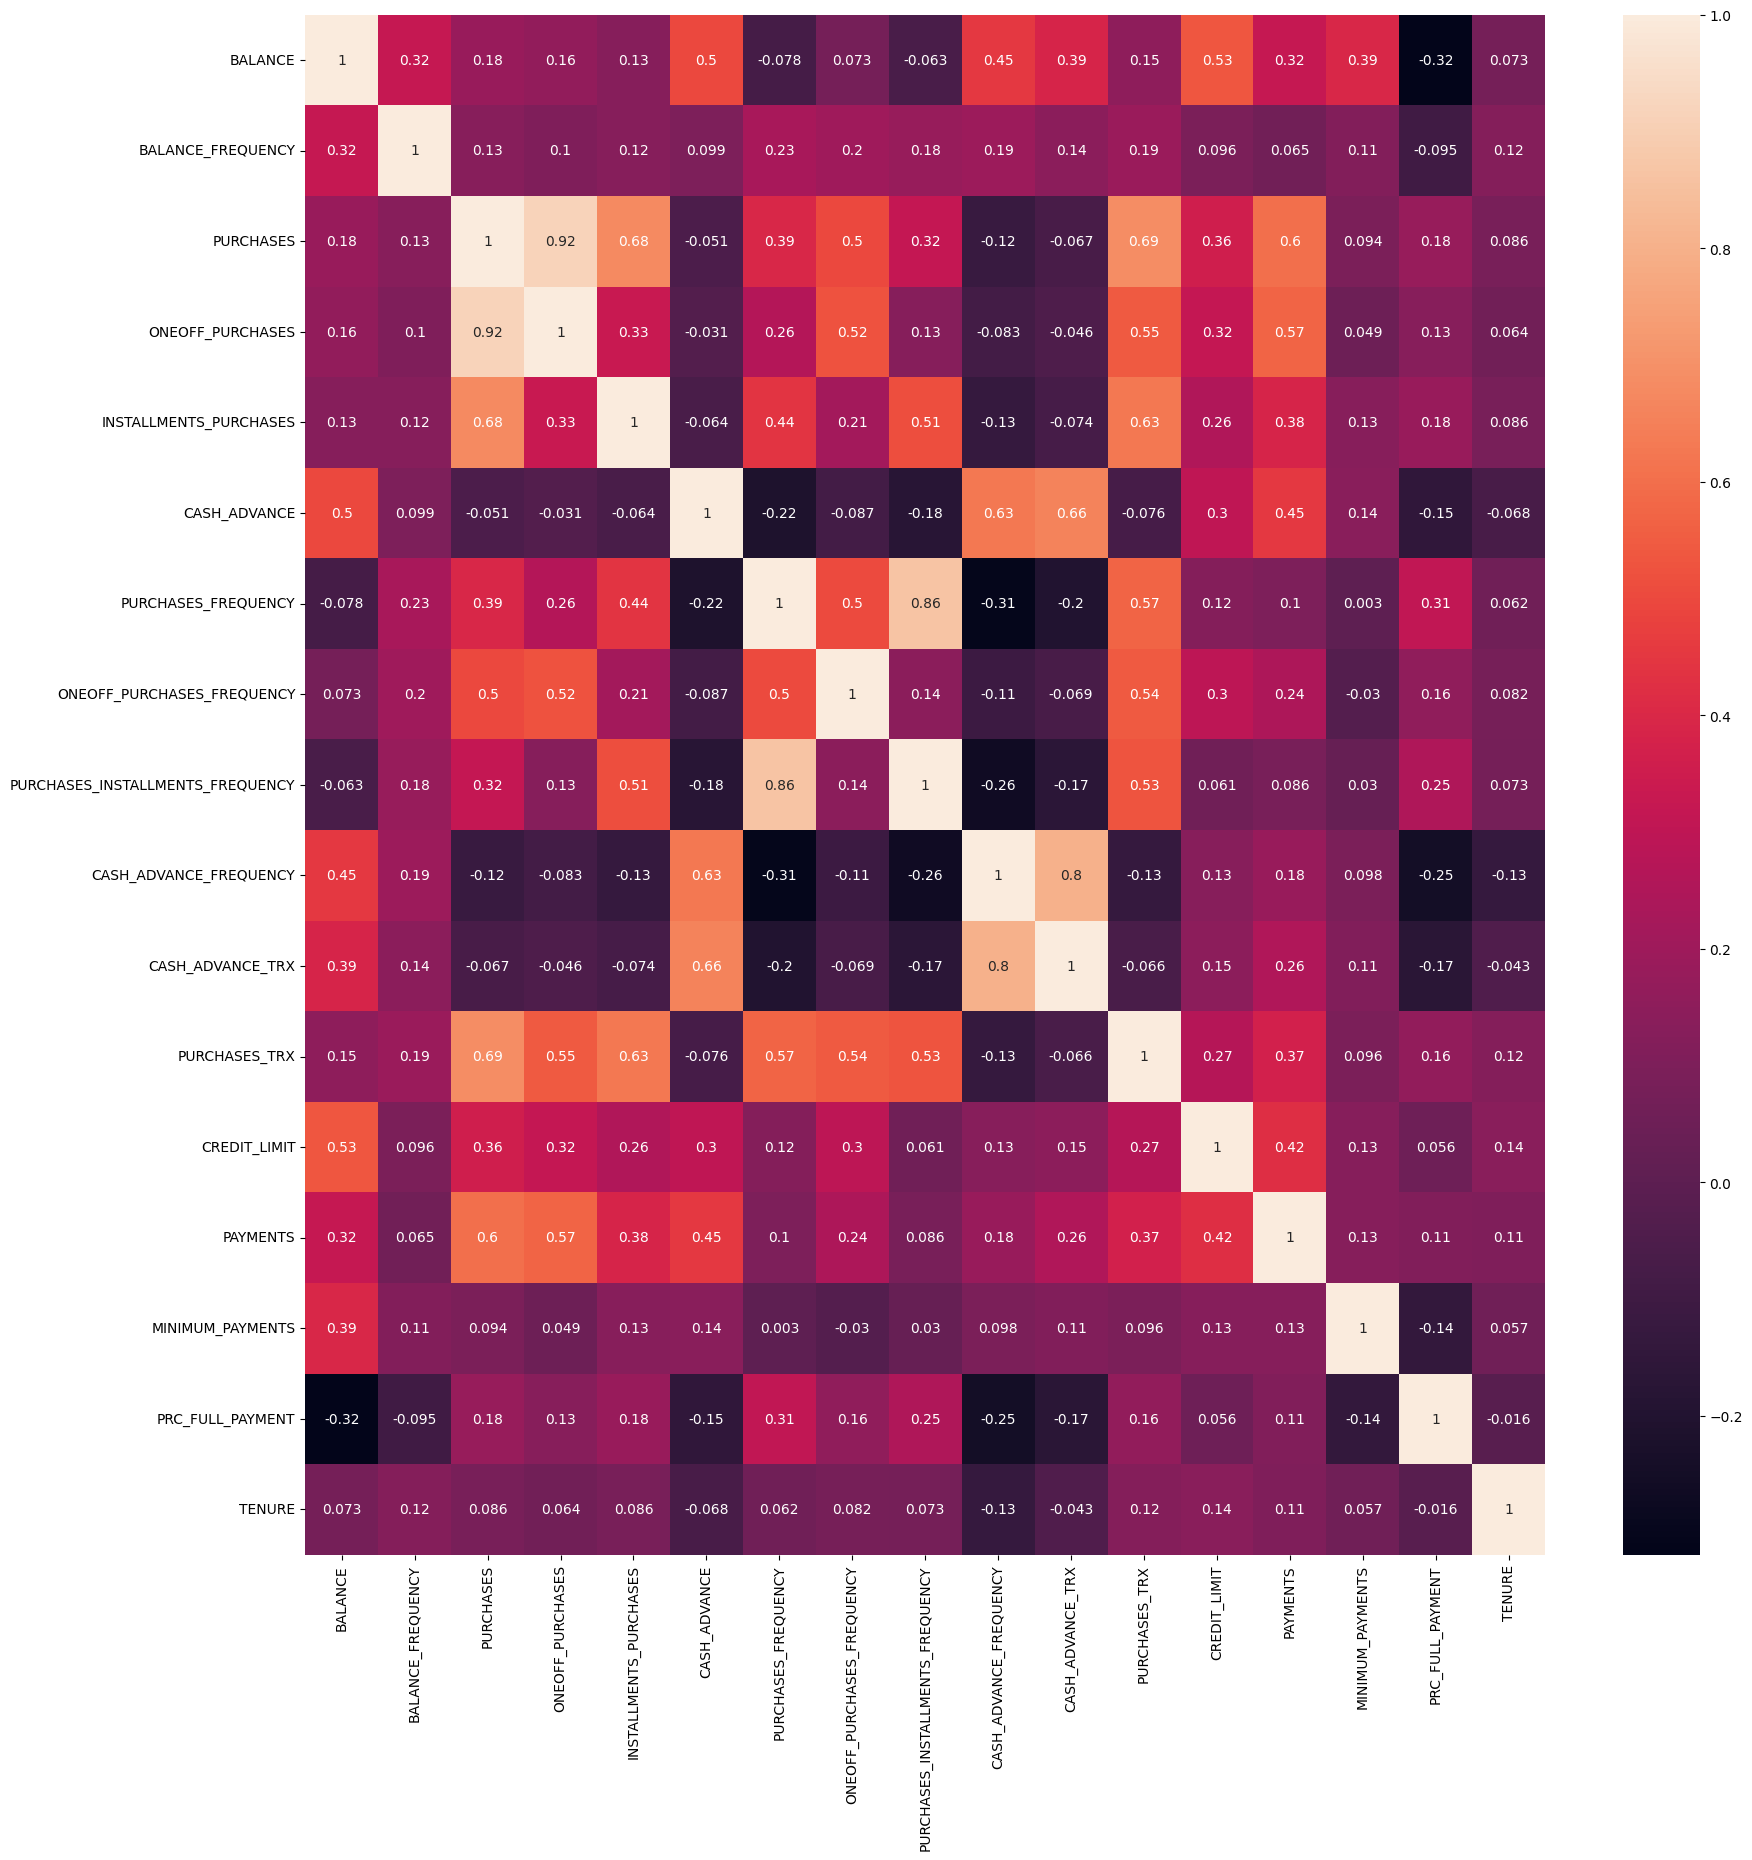

In [18]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

**Algumas Correlações:**

- `PURCHASES` x `ONEOFF_PURCHASES`: 0.92
- `PURCHASES` x `INSTALLMENTS_PURCHASES`: 0.68
- `PURCHASES` x `PURCHASES_TRX`: 0.69
- `PAYMENTS` x `PURCHASES`: 0.60
- `CASH_ADVANCED` x `CASH_ADVANCED_FREQUENCY`: 0.63
- `CASH_ADVANCED_FREQUENCY` x `CASH_ADVANCED_TRX`: 0.80

# 3.0 Pré-Processamento de Dados

- Feature Engineering
- Filtro de Dados
- Preparação dos Dados

## 3.1 Featuring Engineering

Nessa etapa ré realizado o processo de Featuring Engineering, que é criação de variáveis baseada no conjunto de dados com o propósito de obter mais informações que ajudam a agrupar os clientes. Porém, não irei realizar criação de variável, no momento.

## 3.2 Filtragem de Variáveis

### 3.2.1 Filtro de Linhas

- Não será realizado nenhum filtro de linhas.

### 3.2.2 Seleção de Variáveis

- Exclusão das variáveis: 'CUST_ID', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', e 'CASH_ADVANCE'. por causar multicolinearidade.

In [19]:
df = df.drop(['CUST_ID', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
              'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
              'PAYMENTS', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX'], axis=1)

## 3.3 Preparação dos Dados

Para preparar os dados, utilizarei a técnica de Standard Scaler para todas as variáveis na qual o propósito é escalar os dados numa mesma escala.

In [20]:
stc = StandardScaler()
df_sc = stc.fit_transform(df)

# 4.0 Machine Learning

Algoritmos de Machine Learning de Clusterização:

- K-Means

## 4.1 Definição do Número de Clusters

**Método Elbow**

- https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

O Método Elbow é conhecido como método do cotovelo. Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters. A partir do valor indicado pelo “cotovelo” no gráfico significa que não existe ganho em relação ao aumento de clusters.

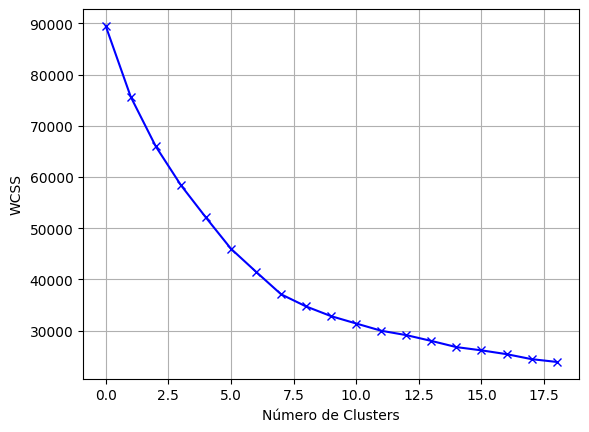

In [21]:
numero_cluster(df_sc)

**Observações:**

- Número de clusters a ser utilizado: 5

## 4.2 K-Means

O K-means é um algoritmo do tipo não supervisionado, ou seja, que não trabalha com dados rotulados.O objetivo desse algoritmo é encontrar similaridades entre os dados e agrupá-los conforme o número de cluster passado pelo argumento k. O algoritimo calcula a distancia entre dois ponto, utilizando a distancia euclidiana.
A distância Euclidiana é a distância mais conhecidas dentre as métricas. Essa distância é a menor distância entre dois pontos no Rn, que pode ser representada pela hipotenusa, observada no Teorema de Pitágoras.

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_sc)
labels = kmeans.labels_

**Quantidade de dados por Grupo**

In [23]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([3103, 1364, 3121,  318, 1044]))

**Observações:**

- Grupo 0: 3103 clientes
- Grupo 1: 1364 clientes 
- Grupo 2: 3121 clientes
- Grupo 3: 318 clientes
- Grupo 4: 1044 clientes

**Clusterização dos Centros**

In [24]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.372884,0.367353,0.185050,1.003871,-0.495250,0.348558,-0.054631,-0.151679,0.469514,0.098820
1,-0.687628,-2.118223,-0.308295,-0.517354,-0.469874,-0.414560,-0.204156,-0.254559,0.246338,-0.168525
2,-0.093437,0.356469,-0.352974,-0.791227,0.254538,-0.470471,-0.408000,-0.093136,-0.440282,-0.081731
3,1.164318,0.473312,3.417267,1.158951,-0.267960,3.577838,1.549259,0.483233,0.288135,0.332482
4,1.926428,0.465641,-0.131269,-0.289549,1.401507,-0.175136,1.175230,0.912491,-0.485332,0.069927


Convertendo Dados Escalonados...

In [25]:
cluster_centers = stc.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788.348268,0.964293,1398.567038,0.893252,0.036040,23.373669,4295.678078,510.725277,0.291040,11.649564
1,133.234906,0.375483,344.527133,0.282711,0.041118,4.405425,3751.645898,270.967766,0.225764,11.291789
2,1369.992744,0.961715,249.070128,0.172793,0.186080,3.015690,3009.979720,647.157914,0.024940,11.407941
3,3987.904753,0.989394,8304.248302,0.955494,0.081523,103.641509,10131.289308,1990.359824,0.237989,11.962264
4,5574.173006,0.987577,722.745727,0.374141,0.415600,10.356597,8770.415435,2990.728773,0.011763,11.610899


**Observações:**

- **Grupo 0**: Clientes que realizam compras com forte frequência, tem o terceiro limite do cartão mais alto (4295) e o primeiro mais alto percentual da fatura completa (0.2910).

- **Grupo 1**: Clientes que realizam compras com pouca frequência, porém tem um limite do cartão moderado e o terceiro mais alto percentual de pagamento da fatura completa (0.2257)

- **Grupo 2**: Clientes que realizam compras com baixissima frequência, porém tem um limite do cartão moderado e sacam dinheiro do cartão de crédito com frequência em relação aos outros grupos. Tem um percentual baixissimo de pagamento da fatura completa (0.0249) 

- **Grupo 3**: Clientes que realizam compras com forte frequência (0.95), tem limite do cartão mais alto (10131) e o segundo mais alto percentual de pagamento da fatura completa (0.2379).

- **Grupo 4**: Clientes que realizam compras com frequência moderada (0.37), tem o segundo limite de cartão mais alto (8770), sacam dinheiro do cartão de crédito com frequência moderada. Tem o percentual mais baixo de pagamento da fatura completa, porém o pagamento mínimo é o mais alto, em média, de 2990.73 dólares.

<h3> Concatenando Base de Dados com os Clusters </h3>

In [26]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.166667,0.000000,2,1000.0,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.000000,0.250000,0,7000.0,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,1.000000,0.000000,12,7500.0,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,0.083333,0.083333,1,7500.0,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,0.083333,0.000000,1,1200.0,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.666667,0.000000,8,1800.0,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,1.000000,0.000000,64,13500.0,198.065894,1.000000,12,3
7,1823.652743,1.000000,436.20,1.000000,0.000000,12,2300.0,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,0.333333,0.000000,5,7000.0,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,0.166667,0.000000,3,11000.0,100.302262,0.000000,12,1


# 5.0 Conclusão

Foi realizada a segmentação de clientes do banco de Nova York em que o modelo de clusterização, K-Means, realizou agrupou os clientes em 5 clusters, utilizando como principais características similares: frequência de compras, limite do cartão do de crédito, percentual de pagamento total da fatura, saque de dinheiro do cartão de crédito.

- **Grupo 0:** 3103 clientes
- **Grupo 1:** 1364 clientes 
- **Grupo 2:** 3121 clientes
- **Grupo 3:** 318 clientes
- **Grupo 4:** 1044 clientes